# Meeting 16.5.25
- Metric accuracy not useful for masks with 90%+ black pixels
- Created Baseline Models - Basic UNet + Simple Encoder-Decoder CNN was not complex enough - Stagnation without Batch Normalization
- Mask prediction metrics vs. binary classification importance

In [1]:
from data import load_mri_dataframe, get_dataloaders

In [2]:
df = load_mri_dataframe()

train_loader, val_loader = get_dataloaders(df)

[Data] Train images: 3143 ; Val images: 786


In [3]:
import torch
import torch.nn as nn

In [4]:
class BaselineUNet(nn.Module):
    def __init__(self):
        super().__init__()
        num_classes = 1
        # Encoder
        self.enc1 = nn.Sequential(nn.Conv2d(3, 16, 3, padding=1), nn.ReLU())
        self.pool1 = nn.MaxPool2d(2)  # 128x128

        self.enc2 = nn.Sequential(nn.Conv2d(16, 32, 3, padding=1), nn.ReLU())
        self.pool2 = nn.MaxPool2d(2)  # 64x64

        # Bottleneck
        self.bottleneck = nn.Sequential(nn.Conv2d(32, 64, 3, padding=1), nn.ReLU())

        # Decoder
        self.up2 = nn.ConvTranspose2d(64, 32, 2, stride=2)  # 64x64
        self.dec2 = nn.Sequential(nn.Conv2d(64, 32, 3, padding=1), nn.ReLU())

        self.up1 = nn.ConvTranspose2d(32, 16, 2, stride=2)  # 128x128
        self.dec1 = nn.Sequential(nn.Conv2d(32, 16, 3, padding=1), nn.ReLU())

        # Final
        self.final = nn.Conv2d(16, num_classes, kernel_size=1)

    def forward(self, x):
        e1 = self.enc1(x)
        p1 = self.pool1(e1)

        e2 = self.enc2(p1)
        p2 = self.pool2(e2)

        b = self.bottleneck(p2)

        u2 = self.up2(b)
        d2 = self.dec2(torch.cat([u2, e2], dim=1))

        u1 = self.up1(d2)
        d1 = self.dec1(torch.cat([u1, e1], dim=1))

        return self.final(d1)


In [5]:
model = BaselineUNet()

device = torch.device('cuda')

Epoch 10/10: 100%|██████████| 393/393 [00:37<00:00, 10.46it/s]


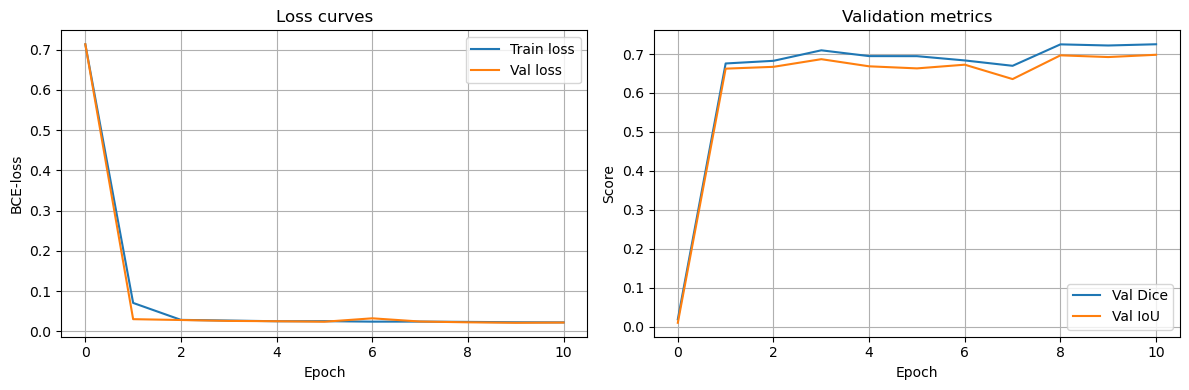

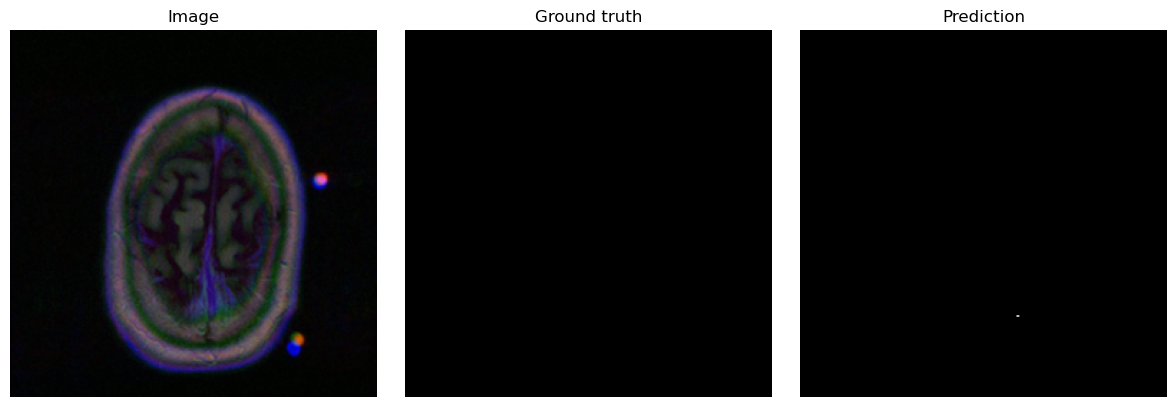

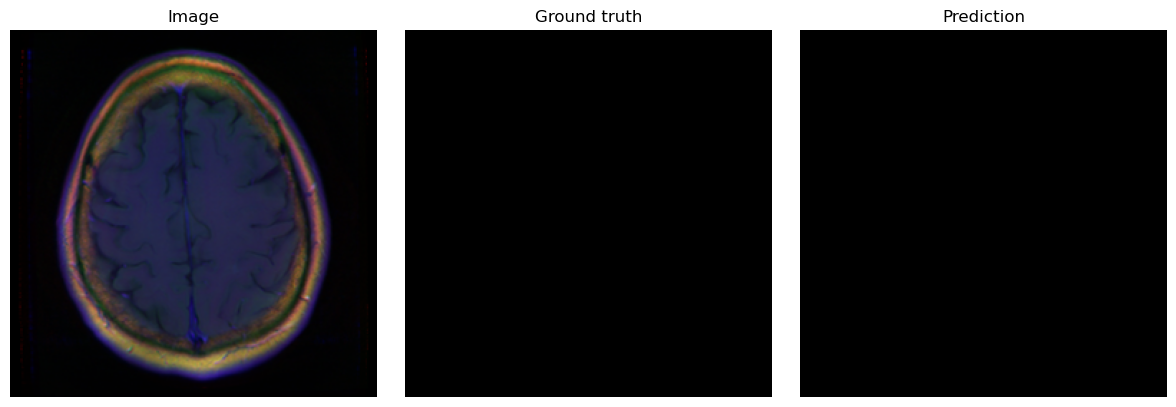

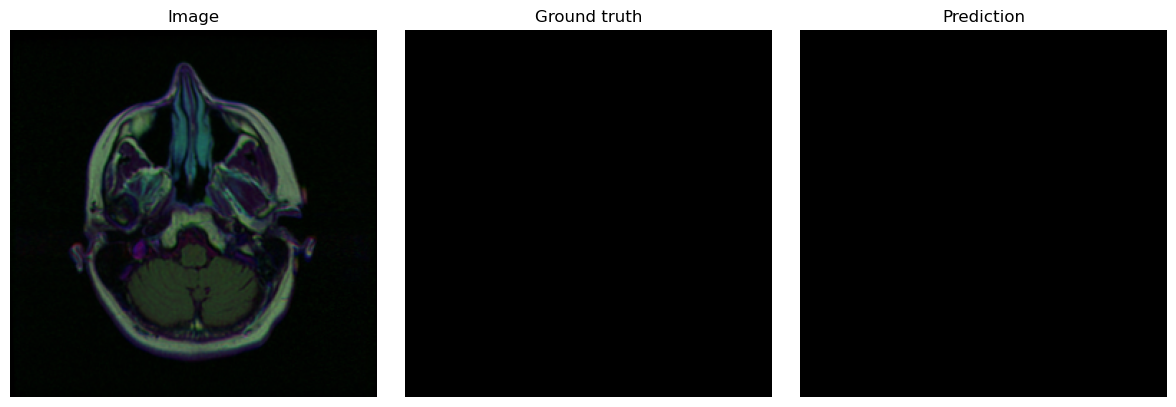

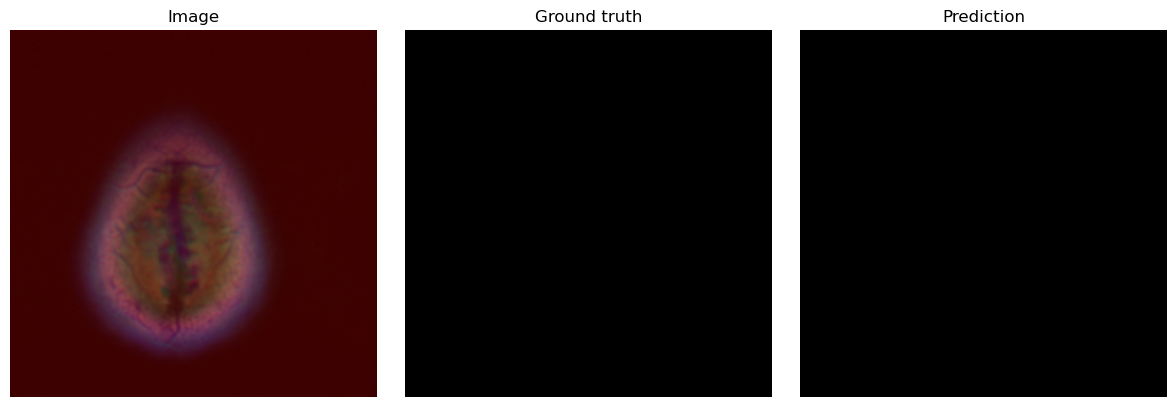

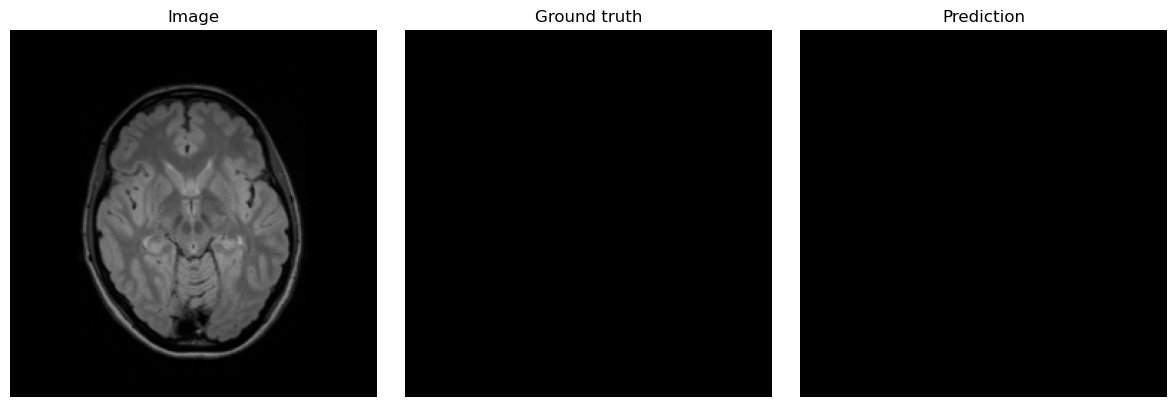

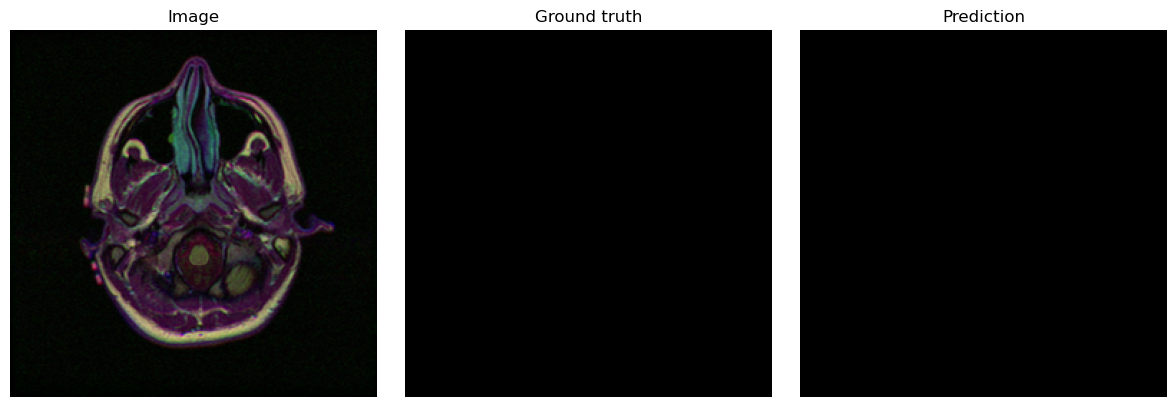

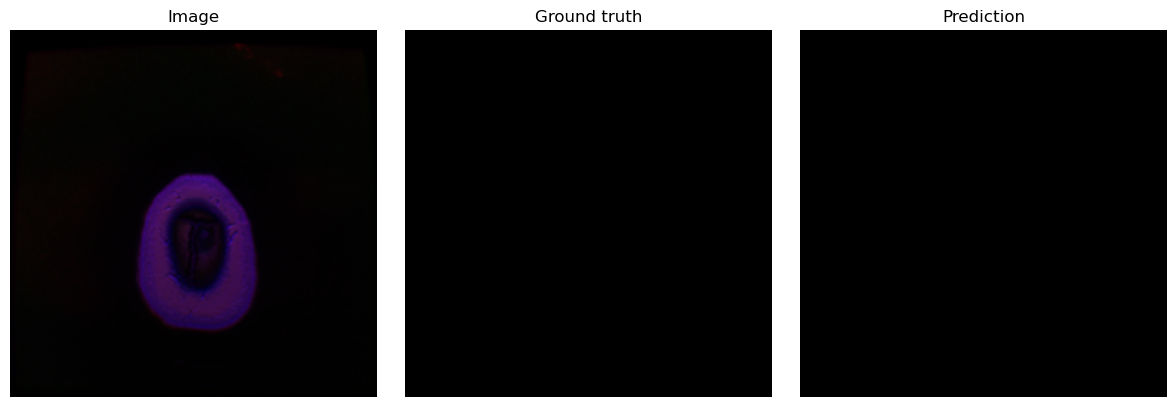

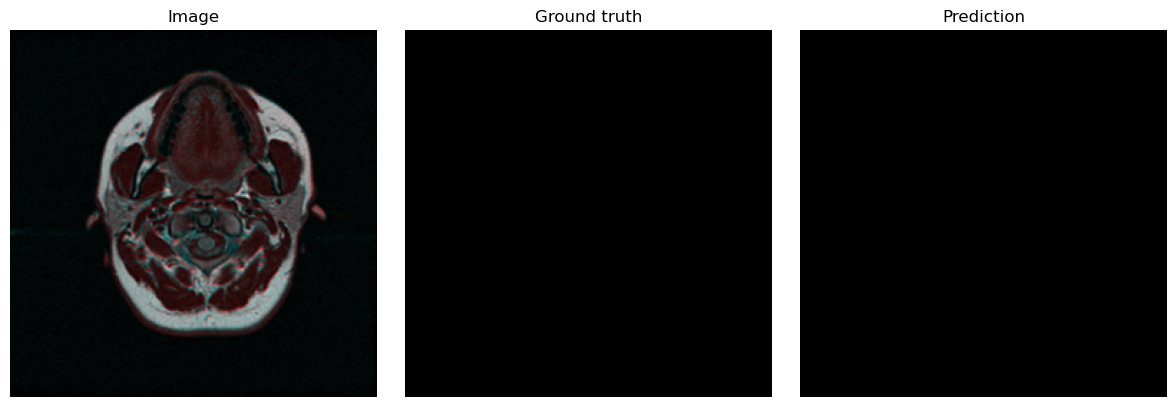

Final Val Dice: 0.7252
Final Val IoU : 0.6981


In [6]:
from train_bce_dice_loss import train_bce_dice_loss, bce_dice_loss, dice_loss, bce_loss, switch_loss
from eval import evaluate

trained_model_bce, results_bce = train_bce_dice_loss(bce_loss, model, train_loader, val_loader, device)
evaluate(results_bce)

Epoch 10/10: 100%|██████████| 393/393 [00:36<00:00, 10.72it/s]


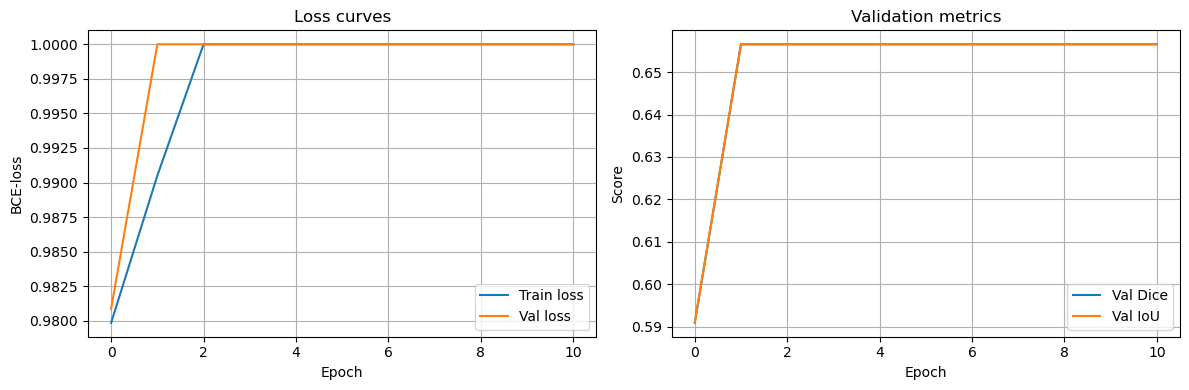

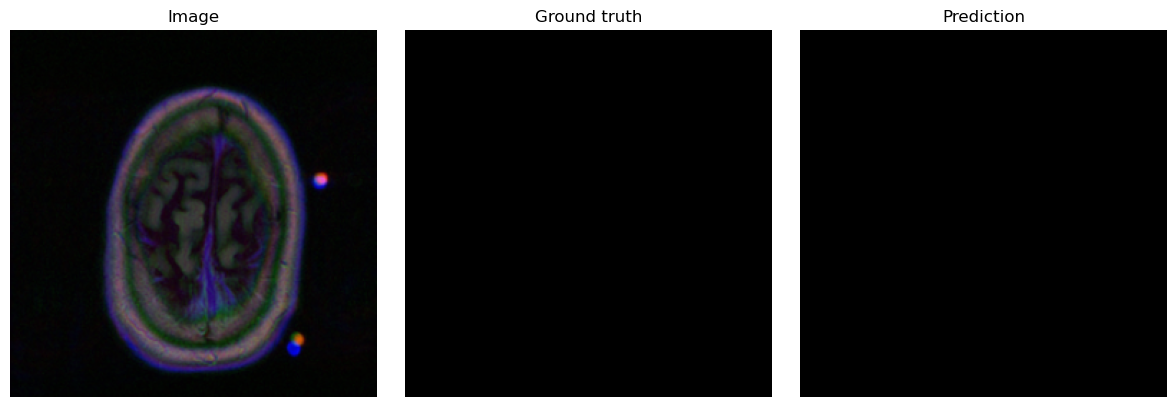

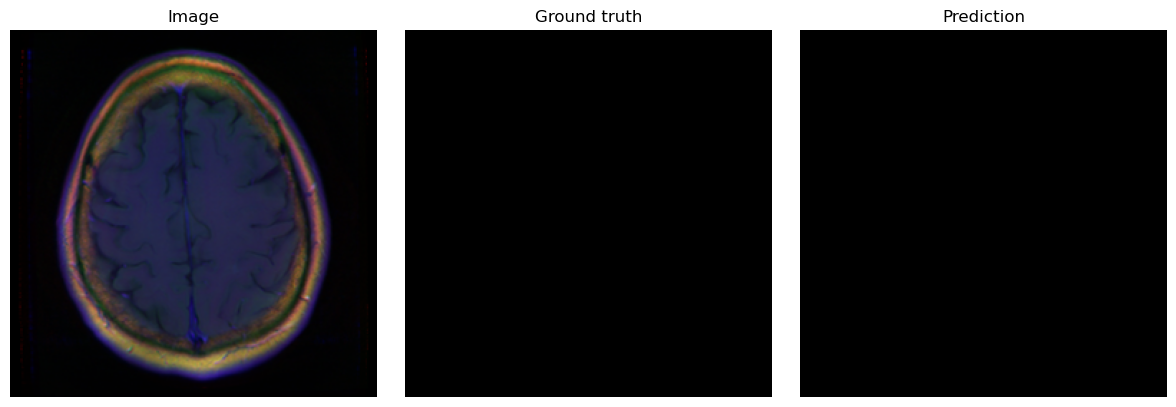

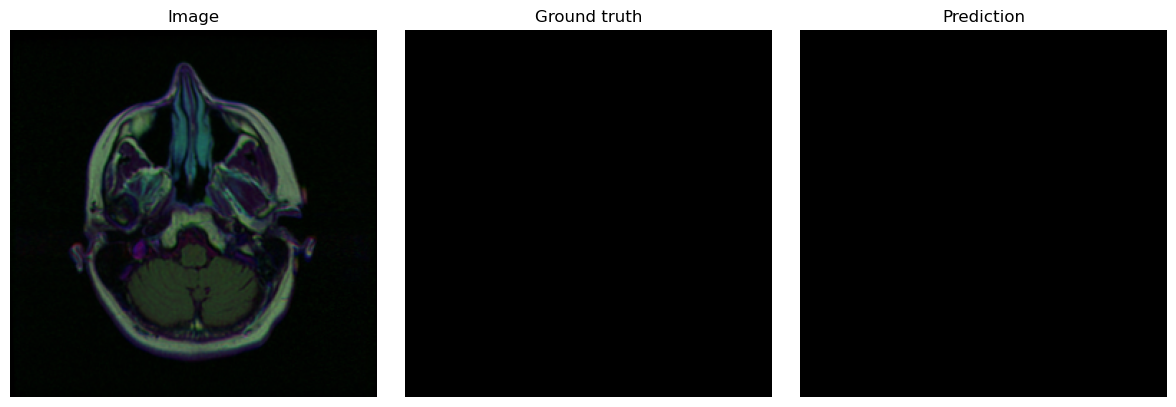

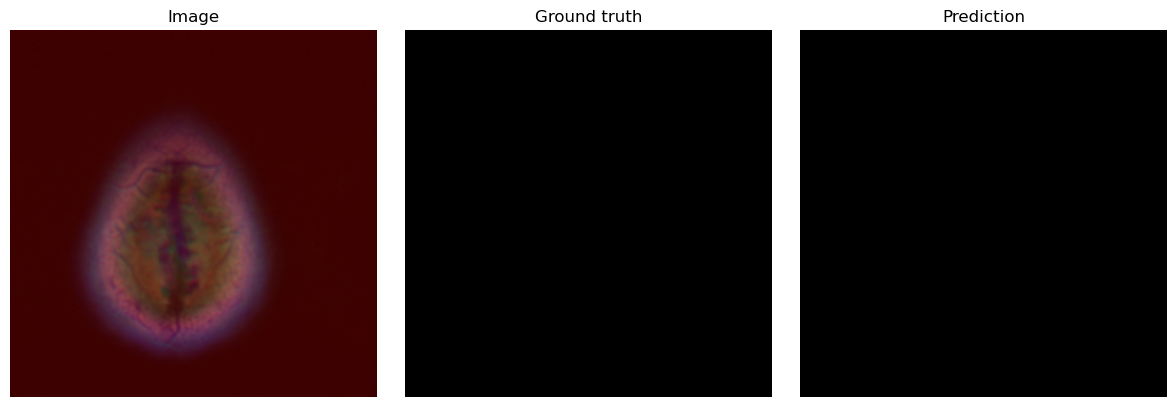

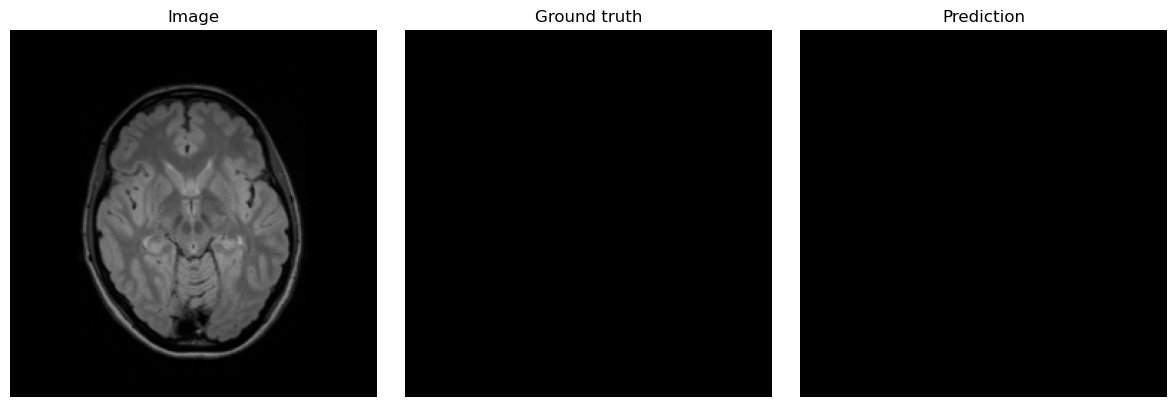

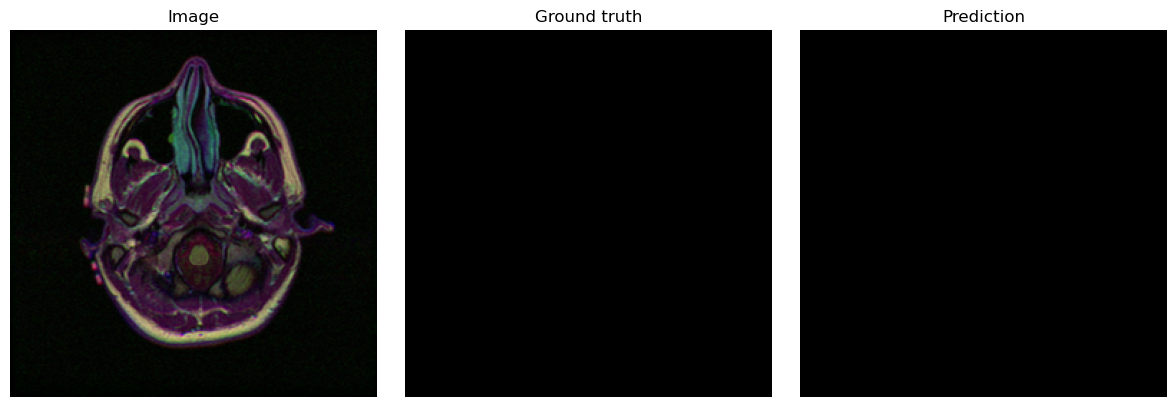

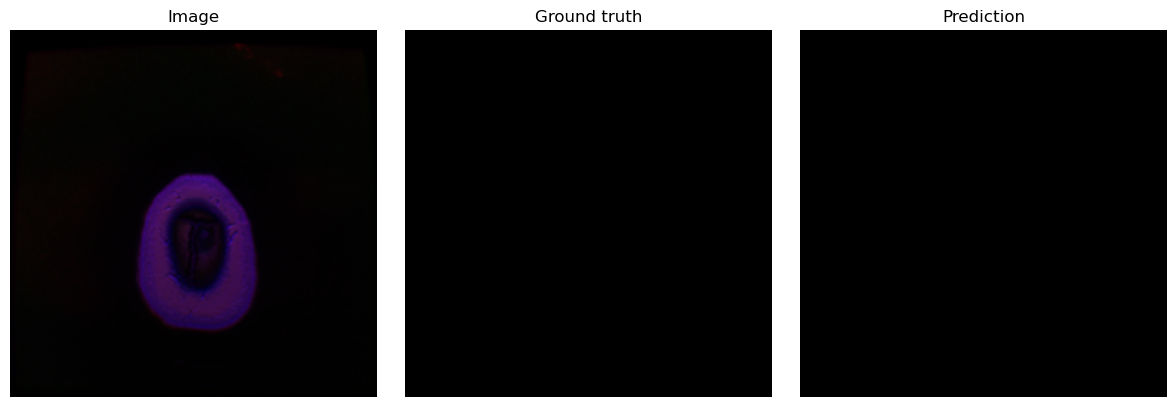

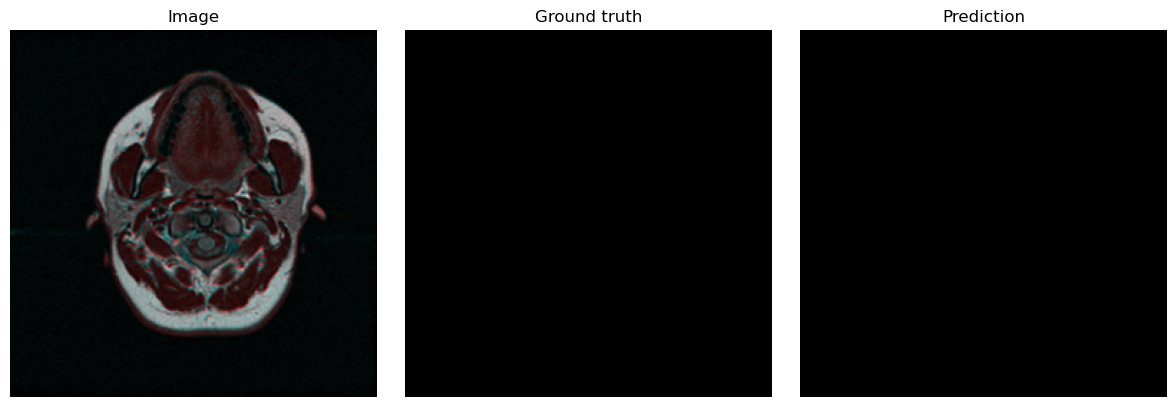

Final Val Dice: 0.6566
Final Val IoU : 0.6566


In [7]:
model = BaselineUNet()
device = torch.device('cuda')
trained_model_dice, results_dice = train_bce_dice_loss(dice_loss, model, train_loader, val_loader, device)
evaluate(results_dice)

Epoch 10/10: 100%|██████████| 393/393 [00:37<00:00, 10.58it/s]


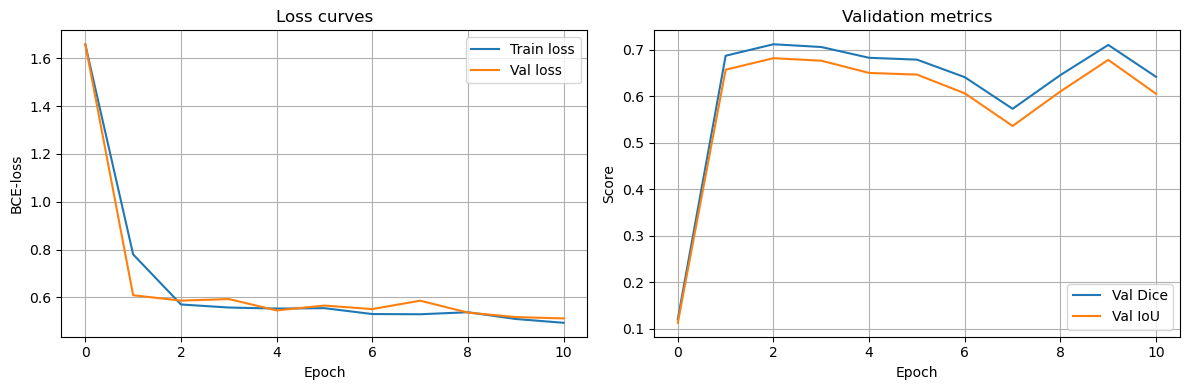

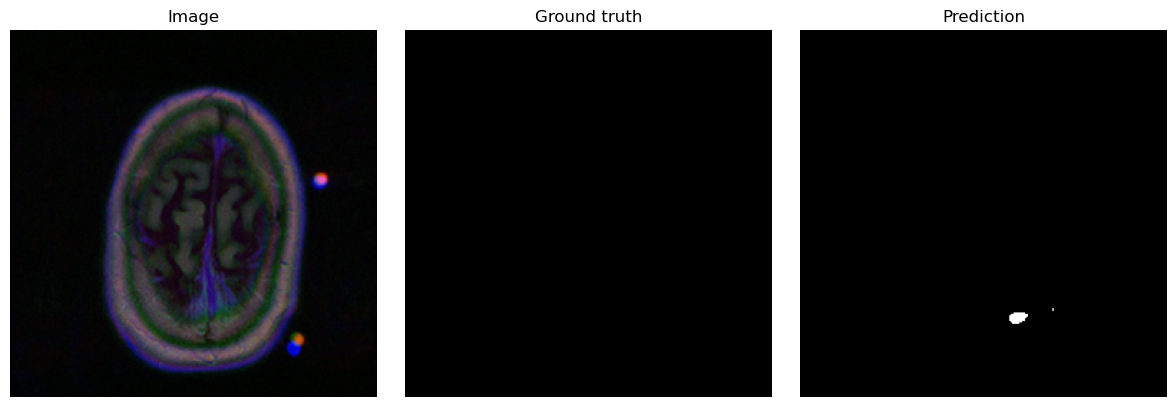

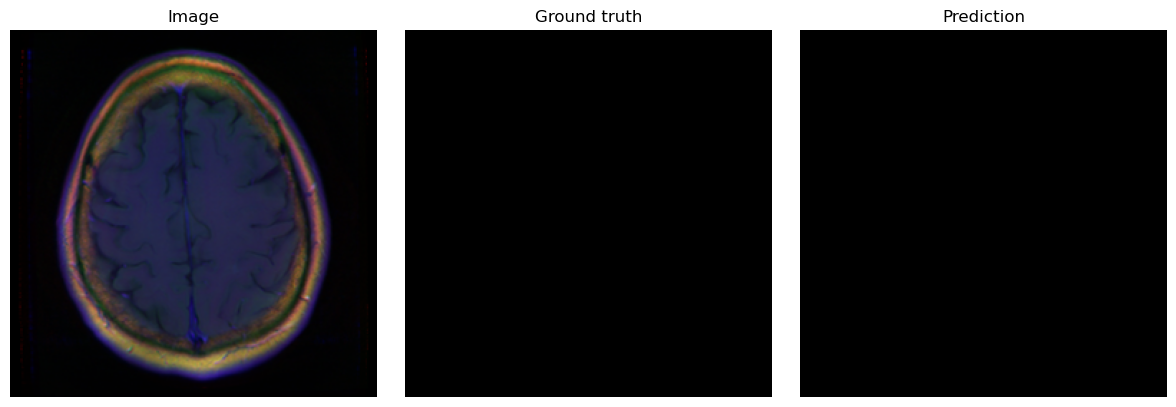

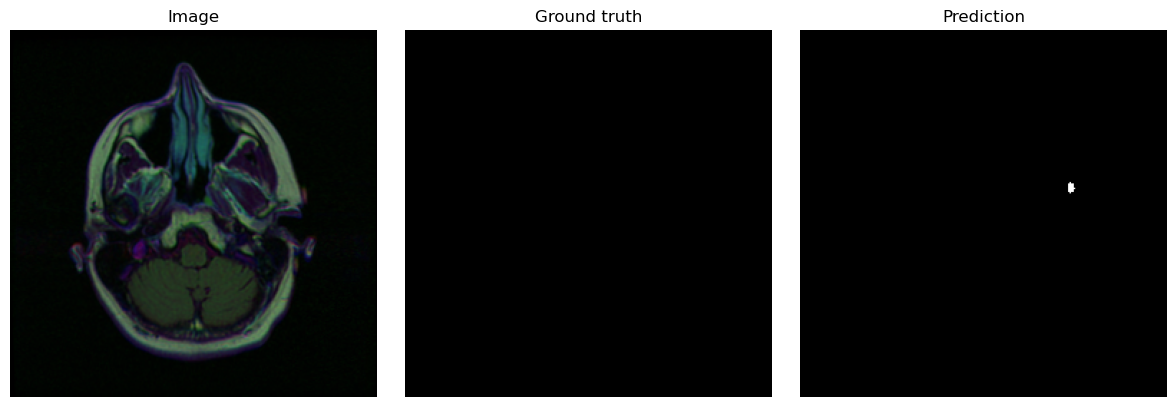

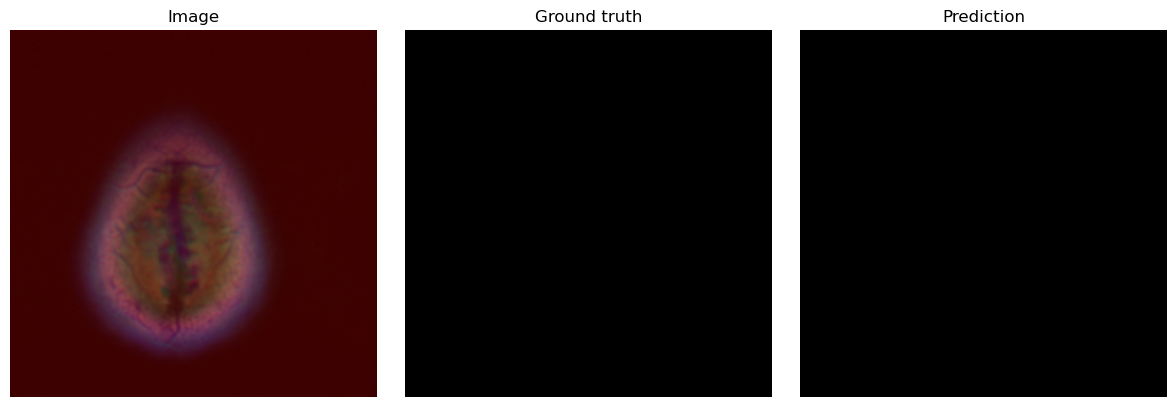

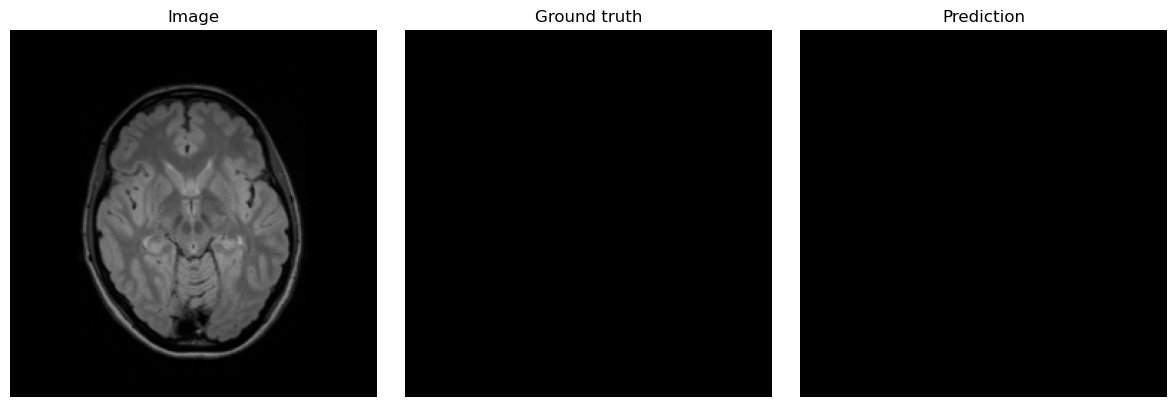

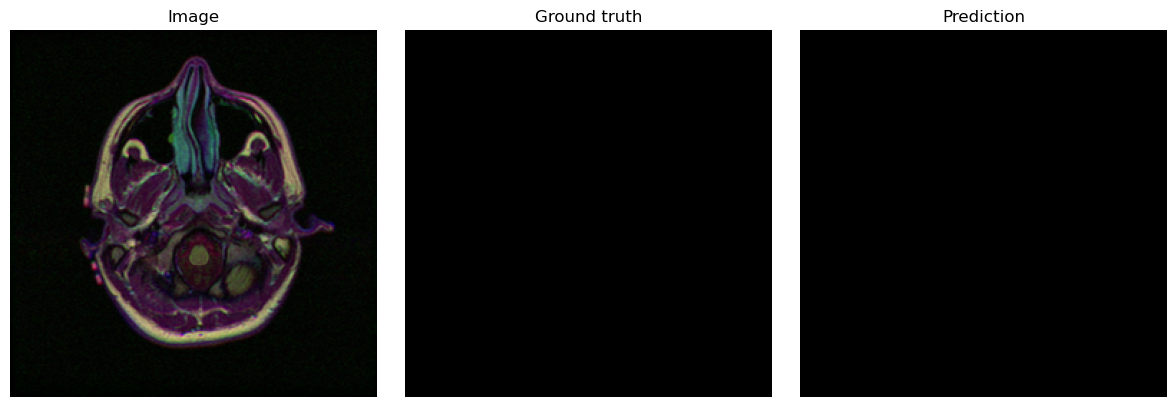

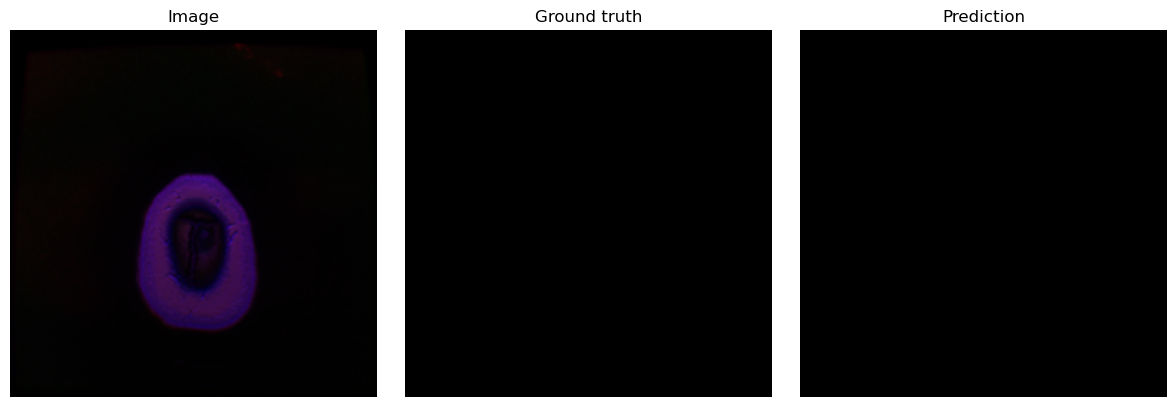

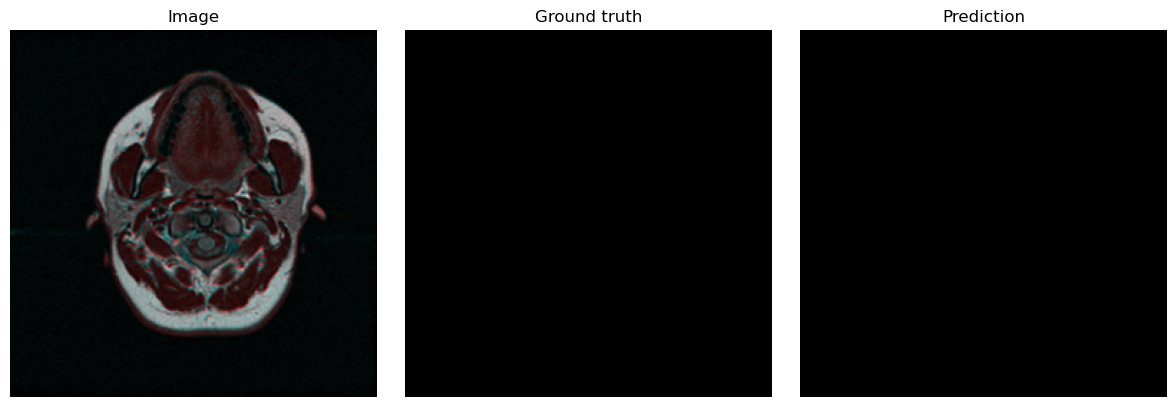

Final Val Dice: 0.6422
Final Val IoU : 0.6057


In [8]:
model = BaselineUNet()
device = torch.device('cuda')
trained_model_bce_dice, results_bce_dice = train_bce_dice_loss(bce_dice_loss, model, train_loader, val_loader, device)
evaluate(results_bce_dice)

Epoch 10/10: 100%|██████████| 393/393 [00:37<00:00, 10.41it/s]


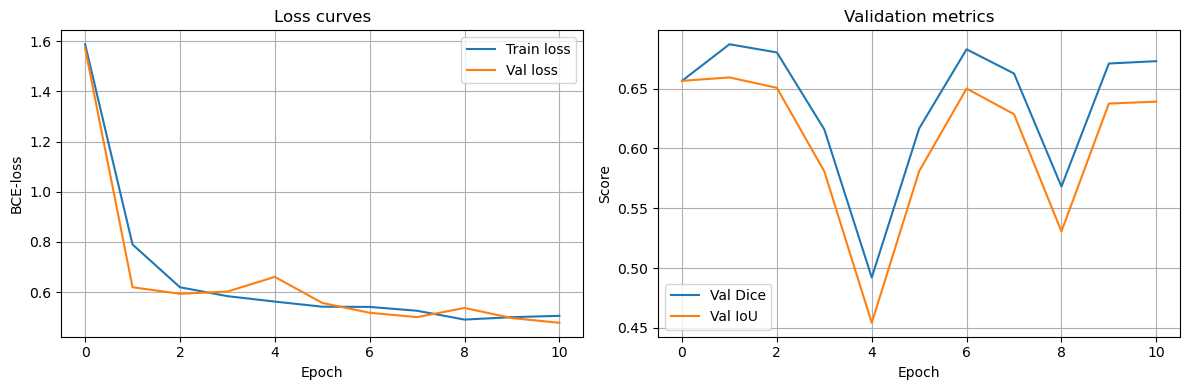

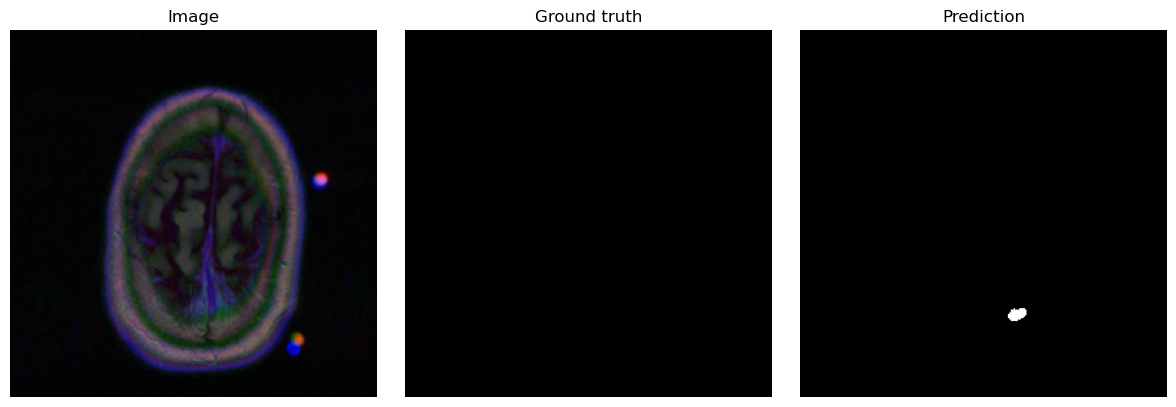

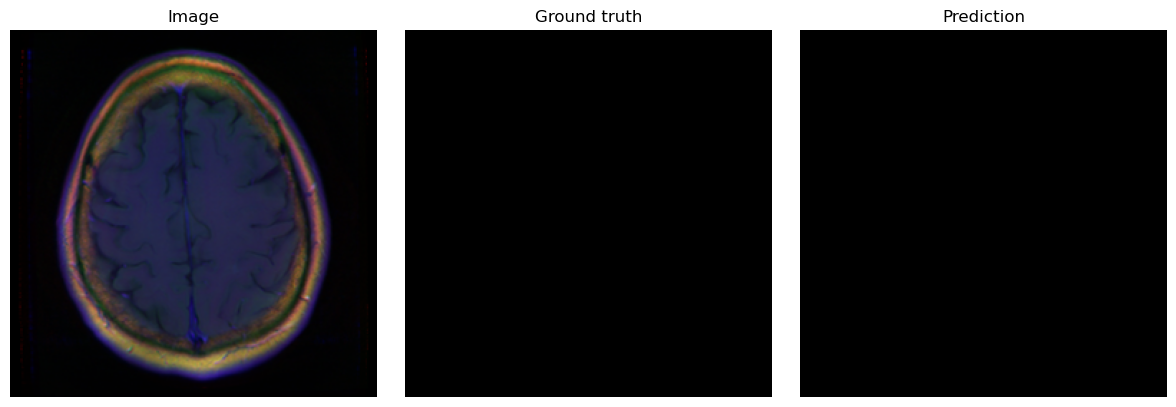

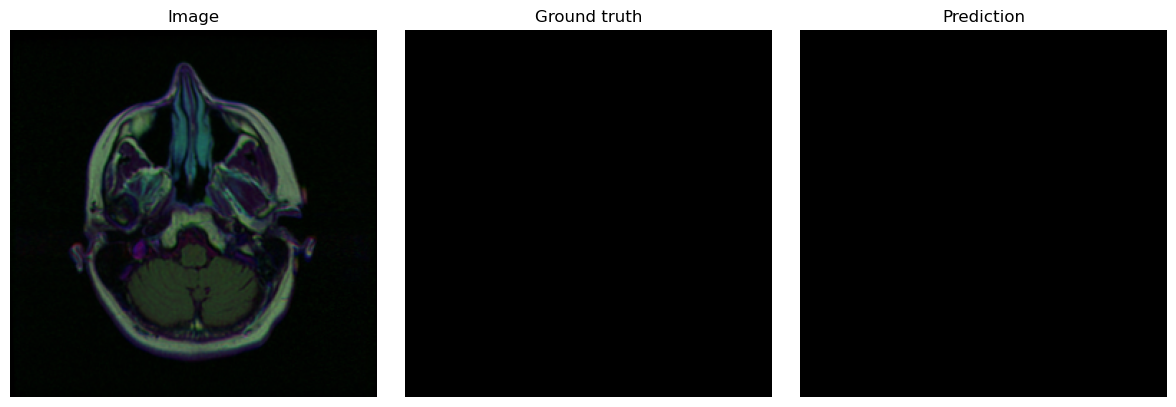

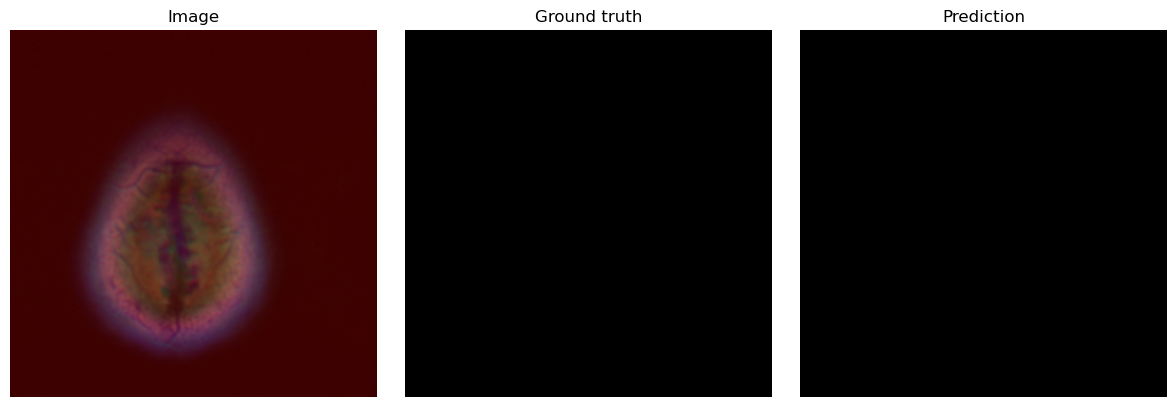

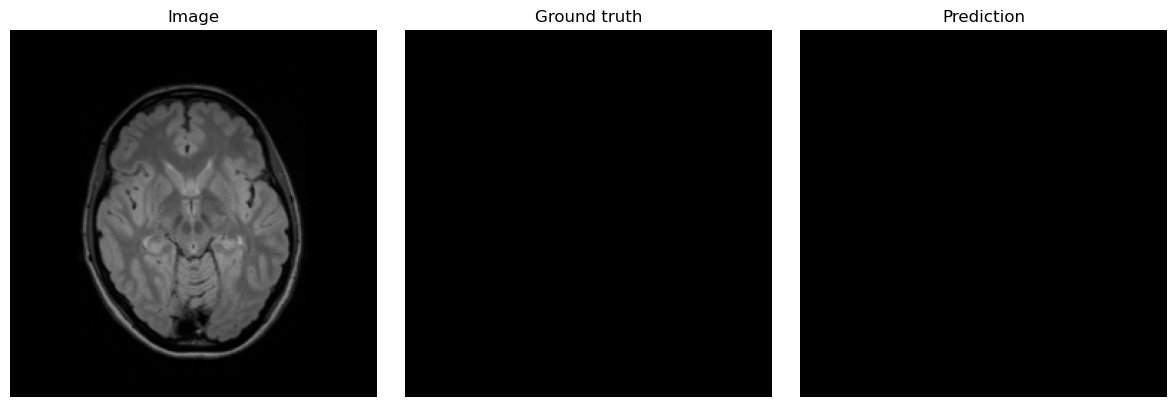

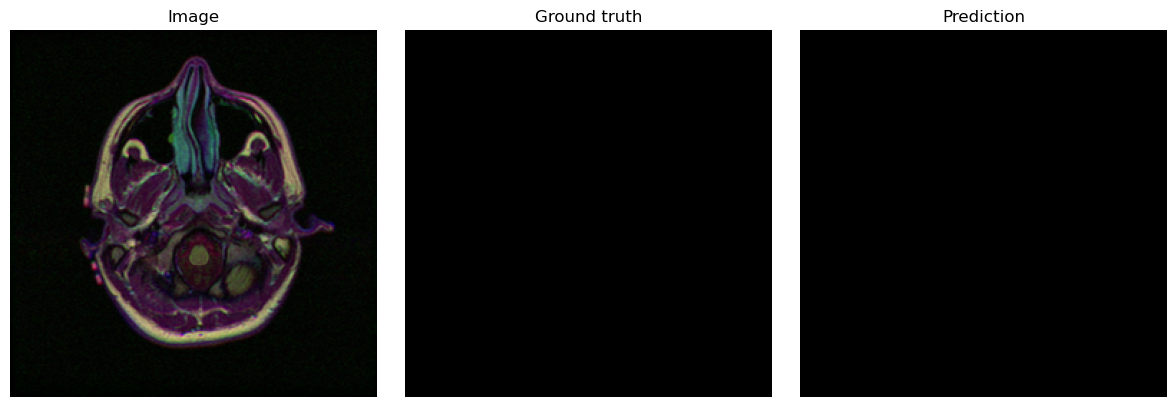

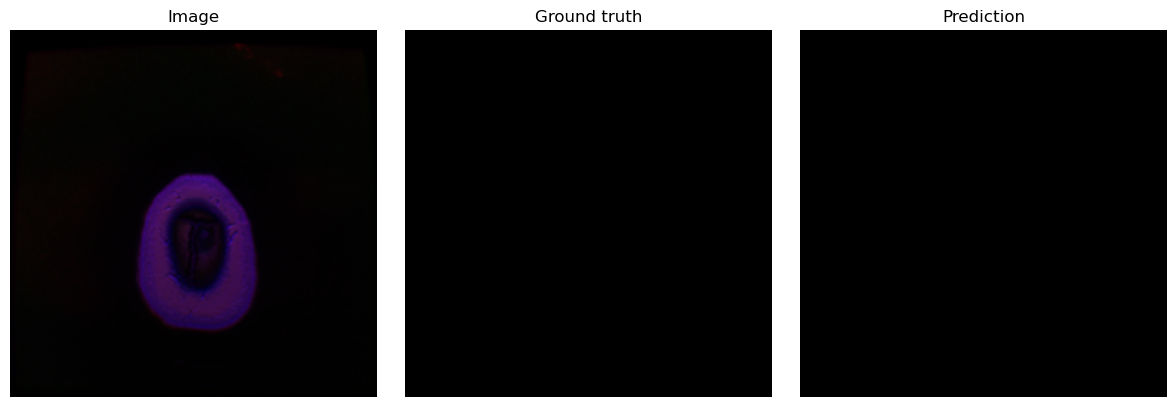

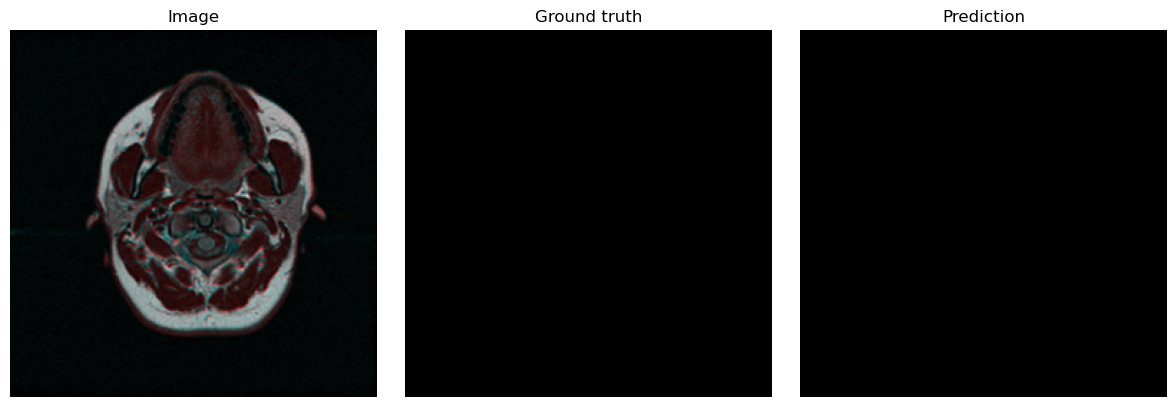

Final Val Dice: 0.6730
Final Val IoU : 0.6392


In [9]:
model = BaselineUNet()
device = torch.device('cuda')
trained_model_switch, results_switch = train_bce_dice_loss(switch_loss, model, train_loader, val_loader, device)
evaluate(results_switch)